In [58]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive


Bài 1. Sử dụng tệp dữ liệu data firenze.csv tạo đồ thị có hướng như hình.
- Biểu diễn dưới các dạng khác nhau
- Pha nhiều màu cho các nút.

In [59]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


In [60]:
df1= pd.read_csv('firenze.csv')
df1.head()

Acciaiuoli  Albizzi  Barbadori  Bischeri  Castellani  Ginori  \
Acciaiuoli           0        0          0         0           0       0   
Albizzi              0        0          0         0           0       1   
Barbadori            0        0          0         0           1       0   
Bischeri             0        0          0         0           0       0   
Castellani           0        0          1         0           0       0   

            Guadagni  Lamberteschi  Medici  Pazzi  Peruzzi  Pucci  Ridolfi  \
Acciaiuoli         0             0       1      0        0      0        0   
Albizzi            1             0       1      0        0      0        0   
Barbadori          0             0       1      0        0      0        0   
Bischeri           1             0       0      0        1      0        0   
Castellani         0             0       0      0        1      0        0   

            Salviati  Strozzi  Tornabuoni  
Acciaiuoli         0        0           0  
Albizzi            0        0           0  
Barbadori          0        0           0  
Bischeri           0        1           0  
Castellani         0        1           0

In [61]:
G = nx.DiGraph()
edges = []

In [62]:
for i in range(len(df1.columns)):
  for j in range(len(df1.columns)):
    if df1.loc[df1.index[i],df1.columns[j]] == 1:
      edges.append((df1.index[i], df1.columns[j]))
reversed(edges)

In [63]:
G.add_edges_from(edges)

In [64]:
G.add_edges_from(edges)
pos = nx.spring_layout(G)

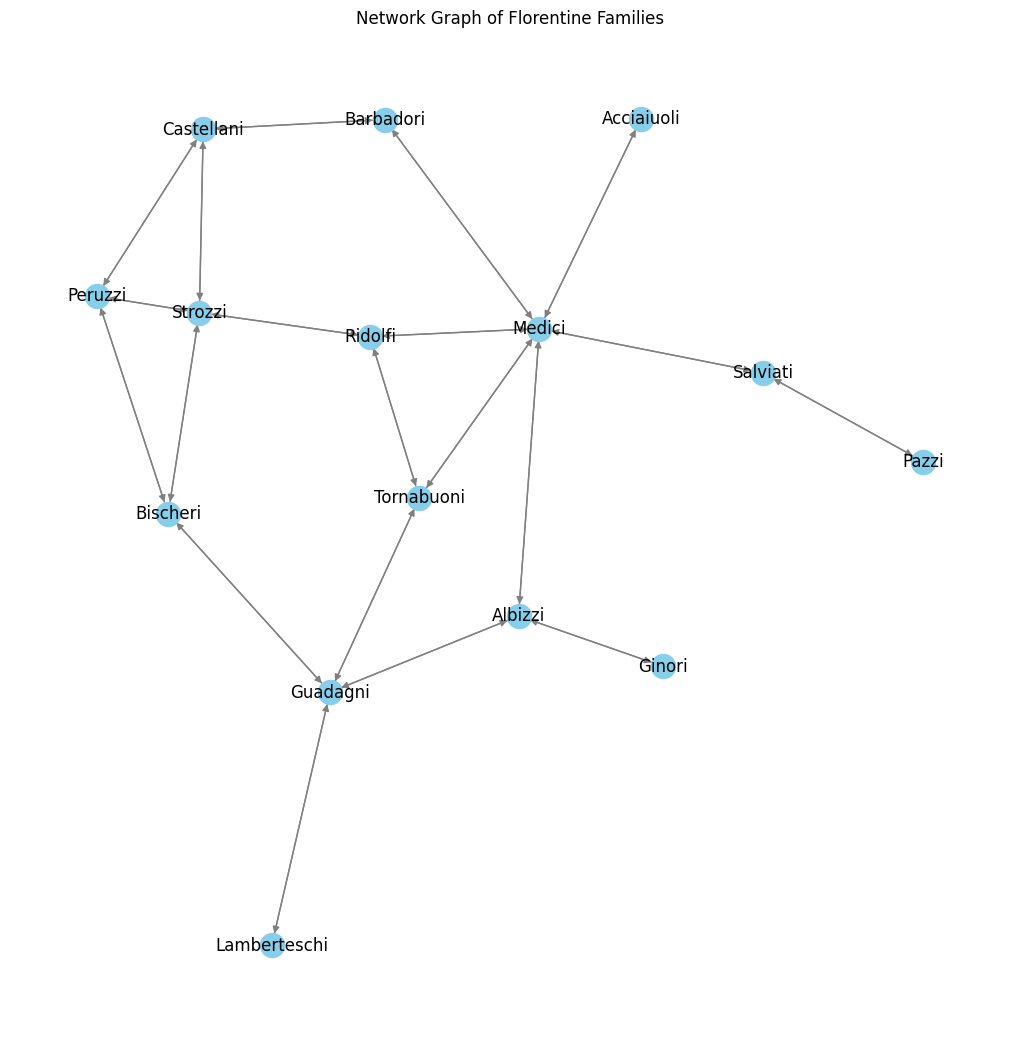

In [65]:
plt.figure(figsize = (10,10))
nx.draw(G,pos,with_labels= True, node_color = 'skyblue',node_size =300,edge_color = 'grey')
plt.title('Network Graph of Florentine Families')
plt.show()


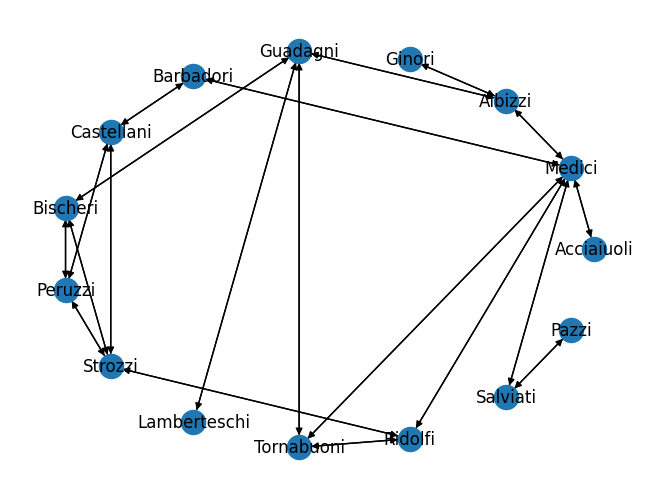

In [66]:
nx.draw_circular(G,with_labels= True)

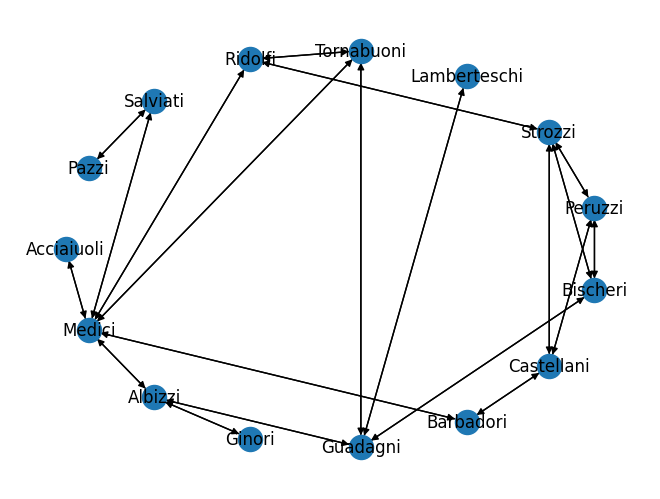

In [67]:
nx.draw_shell(G,with_labels= True)

In [68]:
nx.draw_kamada_kawai(G,with_labels= True)

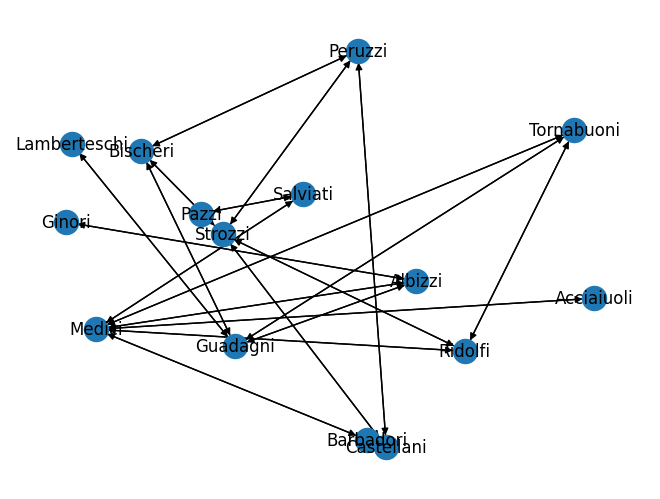

In [69]:
nx.draw_random(G,with_labels= True)

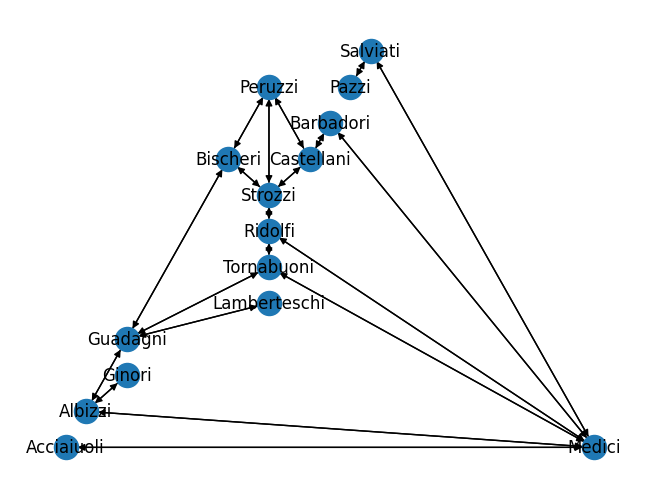

In [70]:
nx.draw_planar(G,with_labels= True)

Bài 2. Sử dụng file dữ liệu dothi3.csv vẽ đồ thị có trọng số sử dụng 3 trường:
preferredName_A', 'preferredName_B', 'score’, score là trọng số

In [71]:
import numpy as np
df2 = pd.read_csv('dothi3.csv')
df2 = df2[['preferredName_A', 'preferredName_B', 'score']]
df2= np.array(df2)
edges = []
for i in range(len(df2)):
  d = df2[i]
  a = d[0]
  b = d[1]
  w = str(d[2]) #trọng số
  edges.append((a,b,w))


In [72]:
G = nx.Graph()

In [73]:
G.add_weighted_edges_from(edges)


In [74]:
pos = nx.spring_layout(G)

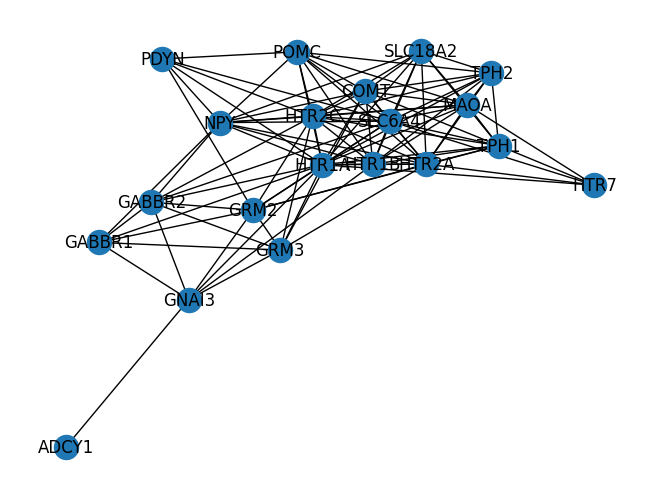

In [75]:
nx.draw(G,pos,with_labels = True)

Bài 3. Sử dụng tệp dữ liệu Vietnam.csv và tệp Vietnam.geojson để vẽ bản đồ
Việt nam tô màu theo tên, tỉnh và các thông tin như hình.

In [76]:
df3 = pd.read_csv('Vietnam.csv')
js = pd.read_json('vietnam.geojson')
df3.head()

province  id  population
0  Kiên Giang  33     2154000
1  Quảng Ninh  49     1127000
2  Bình Phước  11      886400
3  Bình Thuận  12      314500
4      Cà Mau  18     1709600

In [77]:
import plotly.express as px


In [78]:
import json
with open('vietnam.geojson','r',encoding = 'utf-8') as f:
  js = json.load(f)

In [79]:
f = px.choropleth(df3,
              geojson=js,
              locations = 'id',
              featureidkey='properties.id_1',color = 'province', hover_name='province')
f.update_geos(fitbounds = 'locations', visible = False)
f.show()

Output hidden; open in https://colab.research.google.com to view.

#Bài 4. Sử dụng file dữ liệu covid_hoanchinh
1. Vẽ biểu đồ Số ca tử vong do Corona trên một triệu dân, với các tham số:
color="Deaths per Million", hover_name="Country",
color_continuous_scale=px.colors.sequential.YlOrRd
2. Vẽ biểu đồ Số ca nhiễm Corona trên một triệu dân, tự pha màu và hiển
thị tên quốc gia.

In [80]:
df4 = pd.read_csv('covid_hoanchinh.csv')

In [81]:
df4.shape

(158, 8)

In [82]:
df4_over1m = df4.loc[df4['Population (million)']>=1]
df4_over1m.shape

(158, 8)

In [83]:
fig4 = px.choropleth(df4_over1m,
              # geojson=js,
              locations = 'ISO',
              featureidkey='properties.id_1',
              color = 'Deaths per Million',
              hover_name='Country',
              color_continuous_scale = px.colors.sequential.YlOrRd,
                     title = "Số ca tử vong do Corona trên một triệu dân")
fig4.update_layout(width =1000,
                   height = 600)
fig4.show()

#Làm thêm:
1. Sử dụng file data 202004-divvy-tripdata đề vẽ đồ thị thể hiện các tuyến
đường đi giữa các station (thể hiện hướng từ station start tới station end)
(xử lý dữ liệu để thể thể hiện tuyến đường đi giữa các station)
2. Vẽ bản đổ thể hiện các trạm
3. Tìm hiểu và cho hiệu ứng kéo dãn các nút trong đồ thị

In [93]:
df = pd.read_csv('202004-divvy-tripdata.csv')
df.head()

ride_id rideable_type       started_at         ended_at  \
0  A847FADBBC638E45   docked_bike  4/26/2020 17:45  4/26/2020 18:12   
1  5405B80E996FF60D   docked_bike  4/17/2020 17:08  4/17/2020 17:17   
2  5DD24A79A4E006F4   docked_bike   4/1/2020 17:54   4/1/2020 18:08   
3  2A59BBDF5CDBA725   docked_bike   4/7/2020 12:50   4/7/2020 13:02   
4  27AD306C119C6158   docked_bike  4/18/2020 10:22  4/18/2020 11:15   

             start_station_name  start_station_id  \
0                  Eckhart Park                86   
1     Drake Ave & Fullerton Ave               503   
2          McClurg Ct & Erie St               142   
3  California Ave & Division St               216   
4          Rush St & Hubbard St               125   

              end_station_name  end_station_id  start_lat  start_lng  end_lat  \
0  Lincoln Ave & Diversey Pkwy           152.0    41.8964   -87.6610  41.9322   
1              Kosciuszko Park           499.0    41.9244   -87.7154  41.9306   
2   Indiana Ave & Roosevelt Rd           255.0    41.8945   -87.6179  41.8679   
3       Wood St & Augusta Blvd           657.0    41.9030   -87.6975  41.8992   
4   Sheridan Rd & Lawrence Ave           323.0    41.8902   -87.6262  41.9695   

   end_lng member_casual  
0 -87.6586        member  
1 -87.7238        member  
2 -87.6230        member  
3 -87.6722        member  
4 -87.6547        casual

In [94]:
G = nx.DiGraph()
edges = []
for i in range(df.shape[0]):
  edges.append((df['start_station_name'][i],df['end_station_name'][i]))
# edges

In [95]:
G.add_edges_from(edges)
pos = nx.spring_layout(G)

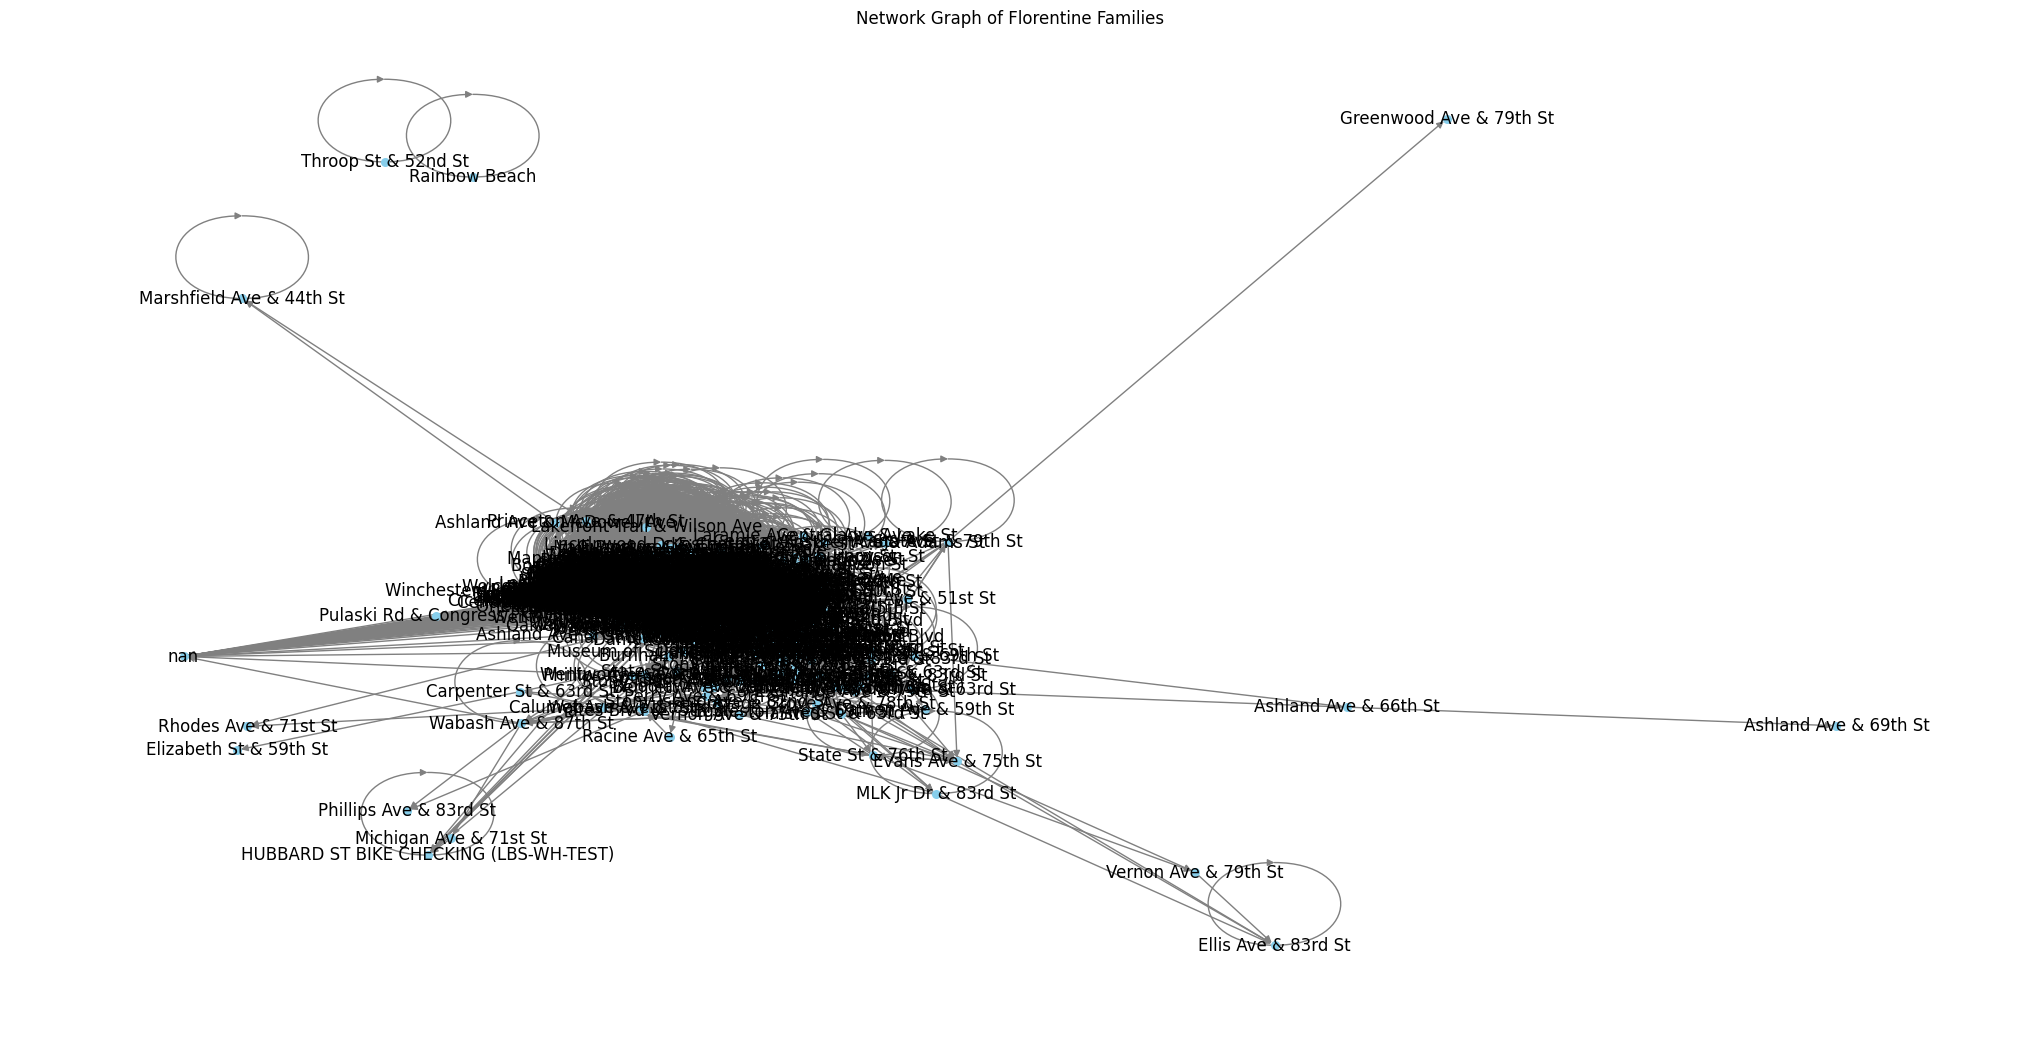

In [98]:
plt.figure(figsize = (20,10))
nx.draw(G,pos,with_labels= True, node_color = 'skyblue',node_size =30,edge_color = 'grey')
# plt.title('Network Graph of Florentine Families')
plt.show()